<a href="https://colab.research.google.com/github/Luceliafn/Alura/blob/Machine-Learning-Introdu%C3%A7%C3%A3o-a-classifica%C3%A7%C3%A3o-com-SKLearn/Introdu%C3%A7%C3%A3o_a_Machine_Learning_Classifica%C3%A7%C3%A3o_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Módulo 4 - Support Vector Machine e a não linearidade

**Estimadores não lineares e support vector machine**

Com o algoritmo do estimador LinearSVC, fomos capazes de encontrar uma borda de decisão na forma de linha. Esse estimador, que tentou modelar os nossos dados, é capaz de encontrar relacionamentos lineares entre as informações que passamos, mas nada além disso. Reparando nos nossos dados, percebemos que o relacionamento entre os projetos finalizados ou não parece ser melhor representado por uma curva, e não uma reta.

Tendo isso em vista, precisamos de outro estimador. Se consultarmos a documentação do Sklearn sobre o LinearSVC, que é um dos estimadores possíveis, encontraremos a informação de que existem diversos parâmetros que podem ser passados para ele.

class sklearn.svm.LinearSVC(penalty=’l2’, loss=’squared_hinge’, dual=True, tol=0.0001, C=1.0, multi_class=’ovr’, fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)[source]¶

Temos, por exemplo, o random_state=None, o que significa que utilizar a aleatoriedade para encontrar a melhor reta representativa para nossos dados. Dessa forma, se executarmos duas vezes nosso código, podemos ter resultados diferentes de acurácia mantendo o mesmo valor de SEED, por exemplo, ora 47.41%, ora 53.0%.

Isso ocorre porque estamos passando o SEED apenas para train_test_split(), e mantendo, sem saber, a aleatoriedade do LinearSVC. Isso significa também que não conseguiremos replicar os resultados.

Uma alternativa é passarmos o random_state=SEED para nosso modelo LinearSVC(). Assim, os resultados se manterão toda vez que rodarmos o algoritmo.

In [2]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [4]:
troca = {
    0 : 1,
    1 : 0
}
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [29]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)

In [31]:
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC(random_state=SEED)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 47.41%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Treinaremos com 1617 elementos e testaremos com 540 elementos

A acurácia foi 53.33%

Para não termos de passar todas as vezes o argumento random_state, aprenderemos um outro recurso do Sklearn. As bibliotecas dessa natureza usam o random_state com o valor None por padrão. Analisando a documentação de muitas dessas bibliotecas, aprenderemos que, quando o valor de random_state é None, o np.random do Numpy é utilizado.

Portanto, se configurarmos np.random.seed() como SEED, não precisamos mais passa-lo para train_test_split() ou para LinearSVC(), pois estamos utilizando o Numpy de forma fixa.

Ao executarmos o código, a acurácia se fixará em 64.44%, e nossa curva de decisão será, em relação a nossa baseline, 20% melhor. Porém, isso aconteceu simplesmente por sorte.

In [25]:
import numpy as np
previsoes_do_guilherme = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_do_guilherme) * 100
print("A acurácia do Guilherme foi %.2f%%" % acuracia)

A acurácia do Guilherme foi 52.59%


In [28]:
SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 64.44%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Quando a biblioteca utiliza o Numpy como parâmetro do random_state, podemos simplesmente passar o SEED com np.random.seed(). Porém, se estivermos utilizando outras maneiras de gerar números aleatórios, teremos que tomar algumas precauções.

No módulo sklearn.smv, teremos diversas variações de algoritmos baseados em uma única ideia: Suport Vector Machines, isto é, SVM. Estávamos utilizando anteriormente o LinearSVC, ou Suport Vector Classification, que é baseado em relacionamentos lineares.

Queremos utilizar um algoritmo mais independente e que encontre relacionamentos diferentes, portanto tentaremos o SVC. Um dos seus parâmetros, inclusive, é o random_state, como podemos verificar na documentação (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [27]:
from sklearn.svm import SVC

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 55.19%


Rodando esse código, teremos:

Treinaremos com 1617 elementos e testaremos com 540 elementos

A acurácia foi 59.07%

Ou seja, um resultado de 59.07%, inferior ao que obtivemos usando LinearSVC. O que pode ter acontecido? Vamos descobrir qual tipo de relacionamento foi realizado pelo SVC. Plotaremos novamente, aproveitando a estrutura de código que já utilizamos para formação de pontos e assim por diante:

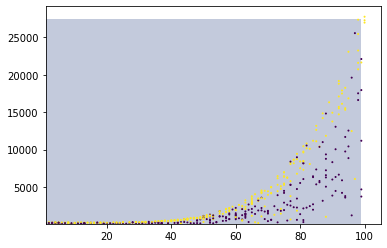

In [32]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

# DECISION BOUNDARY

Analisando a plotagem, percebemos que de fato foram realizados relacionamentos não lineares. Há pequenos agrupamentos de cor diferente que representam as previsões do algoritmo para projetos que terão valor 1, e o restante será 0. Não estamos tendo um palpite muito inteligente.

Isso o ocorre devido a discrepância entre os eixos: em X, teremos valores de 0 a 100, e em Y de 0 a 30000. Esses algoritmos são muito suscetíveis a escala, e darão menos valor para variações menores, como é o caso de X.

Escalas distintas em features causam um desbalanço no algoritmo. Uma alternativa para solucionarmos esse problema é reescalarmos todo o nosso projeto para uma faixa similar. Faremos isso utilizando o escalador padrão do Sklearn, o stadardscaler, que é uma fase de pré-processamento e padronização de valores.

Primeiramente importaremos este recurso (from sklearn.preprocessing import StandardScaler), e então faremos suaves alterações no código que já utilizamos anteriormente.

Queremos elaborar uma nova escala a partir dos valores de X para treino. Para tanto, criaremos um StandardScaler(), que será atribuído à uma variável scaler, e treinaremos esse processo baseado em treino_x. Em seguida, transformaremos treino_x em um novo treino_x que já está na nova escala. Em seguida, repetiremos o processo para teste_x.

Desse modo, todas as features serão utilizadas para treinar o processo de escala, e por fim, atualizadas de acordo com as novas medidas. Já sabemos que não é uma boa prática sobrescrever variáveis, pois podemos nos perder em meio às nomeclaturas. Portanto, renomearemos os dados "crus" (os originais) adicionando o termo raw - ou seja, raw_treino_x e raw_teste_x.



In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


Ao executarmos esse código, estaremos treinando o StandardScaler() com as nossas faixas de dados originais. Em seguida, esses conjuntos são reescalados, gerando um novo treino_x e um novo teste_x. Como resultado, nosso algoritmo retornará:

Treinaremos com 1617 elementos e testaremos com 540 elementos

A acurácia foi 66.85%

Tivemos uma taxa de acerto ainda melhor que a do LinearSVC(), mas ainda precisamos visualizar isso em um gráfico:

In [46]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

# DECISION BOUNDARY

AttributeError: ignored

Ao tentarmos executá-lo, teremos a seguinte mensagem de erro:

AttributeError: 'numpy.ndarray' object has no attribute 'horas_esperadas'

Isso aconteceu porque nossas novas variáveis teste_x e treino_x são arrays de arrays (que, na nova escala, só possuem dois valores).



In [47]:
treino_x

array([[-1.20810685, -0.58850785],
       [-0.25992095, -0.48069545],
       [ 1.46086087,  0.13548927],
       ...,
       [-0.57598292, -0.58492075],
       [ 1.21503489,  0.45294796],
       [ 1.1799169 ,  1.18670998]])

Antes, essas variáveis (agora representadas por raw_teste_x e raw_treino_x) representavam dataframes do Pandas e continham as informações horas_esperadas e preco, que não funcionam mais para nossa plotagem.

Para obtermos a primeira coluna desse array do Numpy (equivalente a horas_esperadas), usaremos teste_x[:,0] - ou seja, todas as linhas e a coluna 0 do array teste_x. Como esse será nosso eixo X, atribuiremos o resultado a uma variável data_x.

Repetiremos o processo para a criação de data_y, pegando todas as linhas da coluna 1 desse array:

In [48]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

Em seguida, alteraremos o código de plotagem de acordo com as novas nomeações:

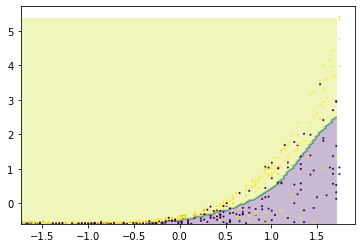

In [49]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)

Por mais que LinearSVC tenha tido uma taxa razoável de 64.44%, a linha de decisão na plotagem foi horrível. Na prática, utilizar o SVC parece ser uma decisão melhor: temos uma curva de decisão bem marcada e o estimador possui uma taxa de acerto um pouco maior, de 66.85%.

Aprendemos que existem diversos estimadores, os dois que utilizamos até agora são baseados em um algoritmo chamado Suport Vector Machine. Um deles possui uma restrição e consegue apenas estabelecer relacionamentos lineares, e o outro é capaz de elaborar curvas e atinge uma taxa de acurácia mais interessante no caso do nosso projeto.

Por fim, você ainda pode explorar o SKLearn e encontrar outros estimadores para trabalhar, dentro e fora do SVM. A seguir, começaremos a estudar mais um desses estimadores.

**Nessa aula aprendemos a:**

* Utilizar o módulo Support Vector Machine;
* Gerar valores randômicos com o módulo SVC;
* Utilizar o módulo Standard Scale.
